# STEM simulations with the standard algorithm

In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np

from ase.build import mx2
from ase.io import read

from tensorwaves.waves import ProbeWaves
from tensorwaves.potentials import Potential
from tensorwaves.detect import RingDetector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Quick Simulation

In [58]:
atoms = read('MoS2.traj')

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


In [59]:
probe = ProbeWaves(energy=80e3, aperture_radius=.02, sampling=.1)

detector = RingDetector(inner=.05, outer=.2)

scan = probe.gridscan(potential=atoms,
                      max_batch=2000,
                      start=(0,0), 
                      end=(cell[0]/2, cell[1]/2), 
                      sampling=.3, 
                      detectors=detector)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 11/11 


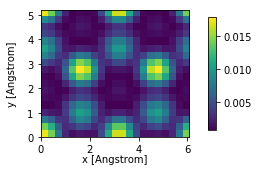

In [60]:
image = scan.image()
image.show()

## Step-by-step Simulation

### Set up unit cell

In [62]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19)
atoms *= (2,2,1)
atoms.cell[1,0] = 0
atoms.wrap()
atoms *= (2,2,1)
atoms.center(vacuum=2, axis=2)

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  7.19      ]


### Create Potential

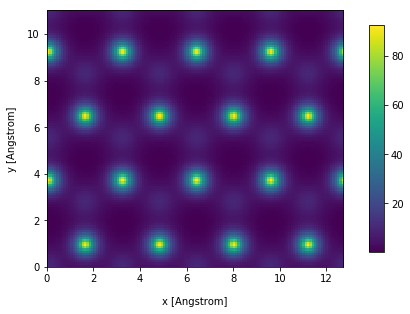

In [22]:
potential = Potential(atoms=atoms, parametrization='kirkland', num_slices=10, sampling=.1)

potential.current_slice = 3

potential.show(fig_scale=2)

### Create Probe

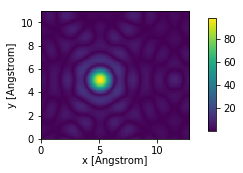

In [29]:
probe = ProbeWaves(energy=80e3, aperture_radius=.02, gpts=potential.gpts, extent=potential.extent)
probe.aberrations.parametrization.defocus = 10

probe.positions = (5,5)
probe.get_tensor().show()

In [160]:
S.aberrations.parametrization.defocus

100

### Create Detector

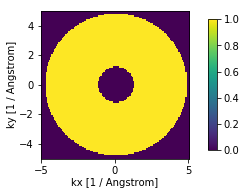

In [24]:
detector = RingDetector(inner=.05, outer=.2, gpts=probe.gpts, extent=probe.extent, energy=probe.energy)

detector.get_tensor().show(display_space='fourier')

### Perform Grid Scan 

In [30]:
start = (0,0)
end = (cell[0,0]/2, cell[1,1]/2)

scan = probe.gridscan(potential=potential, start=(0,0), end=end, sampling=.2, detectors=detector, max_batch=800)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 10/10 


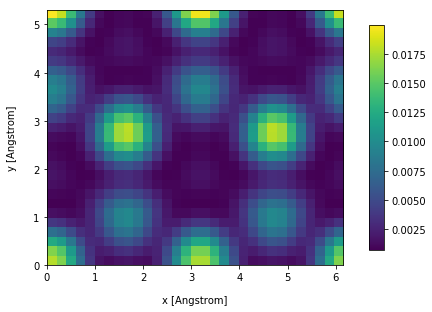

In [44]:
image = scan.image()
image.show(fig_scale=2)

In [45]:
image.numpy()

array([[[0.01780853, 0.01629192, 0.0124383 , 0.0077766 , 0.00384508,
         0.00151513, 0.0007821 , 0.00102903, 0.0015054 , 0.0017131 ,
         0.00154063, 0.00118516, 0.00099866, 0.00135096, 0.00250629,
         0.00447674, 0.0068857 , 0.00896849, 0.00983336, 0.00895088,
         0.00662346, 0.00408565, 0.00303485, 0.00474388, 0.00923907,
         0.01508036, 0.01996285],
        [0.01627518, 0.0148344 , 0.01125682, 0.00697924, 0.00342071,
         0.00135445, 0.00073419, 0.00096623, 0.00136732, 0.00151187,
         0.00132892, 0.00100648, 0.00084727, 0.00116301, 0.00218737,
         0.00395205, 0.00614711, 0.00809308, 0.00896012, 0.00822233,
         0.00611606, 0.00376152, 0.00274039, 0.0042619 , 0.00837643,
         0.01375425, 0.01824691],
        [0.01233244, 0.01113113, 0.00832533, 0.00509276, 0.00252368,
         0.00112758, 0.00075703, 0.00089978, 0.00107386, 0.00106262,
         0.00090526, 0.00075196, 0.00074954, 0.00102804, 0.00172018,
         0.00290487, 0.00446037, 0.